In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import sys

In [3]:
### Definitions ###

def angle_to_eta(theta):
    return LSS_radius*theta#/np.sqrt(4*np.pi)

def LSS_loc(r):
    loc = -eta+grid_len_r*r # Find distance from LSS (negative = inside, positive = outside)
    return loc

def dist_2spot(r1,r2,x,y):    # flag:  if separation is large, the curvature is involved so flat space approximation may fail
    delta_r = (r2-r1)*grid_len_r # in Mpc
    x_Mpc = x*grid_len_x # in Mpc
    y_Mpc = y*grid_len_x # in Mpc
    dist = np.sqrt(delta_r**2+x_Mpc**2+y_Mpc**2)
    return dist

def Get_Dis(x1,y1, x2,y2):
    return np.math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

def interpolation(x, y):
    return interpolate.interp1d(x, y)

### Definitions ###

In [3]:
nside = 1024
LSS_radius = 13800-280

# A number of pixels
Npixels = 12*nside**2

# pixel size analytic(Rad)
pix_radsq = 4*np.pi/Npixels # Solid angle
pix_rad = np.sqrt(pix_radsq) # Square pixel side length in rad

pix_mpc = angle_to_eta(pix_rad) # (Mpc) 1 pixel size ~ 6.7 Mpc


r_bins = 50 # No need to change
#grid_len_r = eta*2/r_bins # Mpc (each grid length)
grid_len_x = pix_mpc # Mpc = grid_len_y


ang_arr = np.logspace(-3.7, -0.7, num=100)
#radius_arr = angle_to_eta(ang_arr) # Mpc
radius_arr = ang_arr
pix_arr = (0.2+np.arange(0,25))* grid_len_x # Mpc, Offset is introduced to mimic center pixel
#print(radius_arr[0]) 2.69 Mpc
#print(pix_arr[0])    2.70 Mpc

eta = 50

eta50SW_angle_arr = np.loadtxt(f'SW_stack_eta{eta}.txt')
eta50ISW_angle_arr = np.loadtxt(f'ISW_stack_eta{eta}.txt')

eta = 100

eta100SW_angle_arr = np.loadtxt(f'SW_stack_eta{eta}.txt')
eta100ISW_angle_arr = np.loadtxt(f'ISW_stack_eta{eta}.txt')

eta = 160

eta160SW_angle_arr = np.loadtxt(f'SW_stack.txt')
eta160ISW_angle_arr = np.loadtxt(f'ISW_stack.txt')

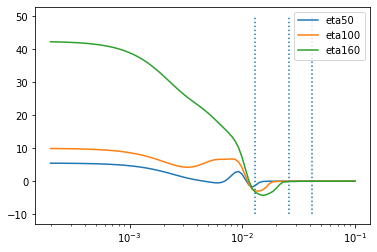

In [51]:
ran = 90

plt.plot(radius_arr[:ran],(eta50SW_angle_arr+eta50ISW_angle_arr)[25][:ran],label = 'eta50')
plt.plot(radius_arr[:ran],(eta100SW_angle_arr+eta100ISW_angle_arr)[25][:ran],label = 'eta100')
plt.plot(radius_arr[:ran],(eta160SW_angle_arr+eta160ISW_angle_arr)[25][:ran],label = 'eta160')

plt.vlines(np.sqrt(4*np.pi)*50/13800, ymin = -10,ymax = 50, linestyle=':')
plt.vlines(np.sqrt(4*np.pi)*100/13800, ymin = -10,ymax = 50, linestyle=':')
plt.vlines(np.sqrt(4*np.pi)*160/13800, ymin = -10,ymax = 50, linestyle=':')

plt.legend()
plt.xscale('log')

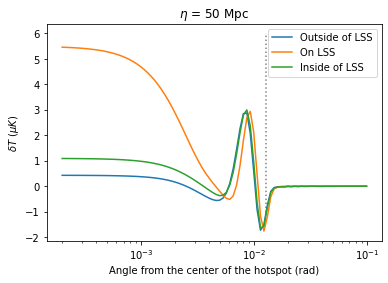

In [58]:
plt.plot(radius_arr[:ran],(eta50SW_angle_arr+eta50ISW_angle_arr)[1][:ran],label = 'Outside of LSS')
plt.plot(radius_arr[:ran],(eta50SW_angle_arr+eta50ISW_angle_arr)[25][:ran],label = 'On LSS')
plt.plot(radius_arr[:ran],(eta50SW_angle_arr+eta50ISW_angle_arr)[48][:ran],label = 'Inside of LSS')

plt.vlines(np.sqrt(4*np.pi)*50/13800, ymin = -1,ymax = 6, linestyle=':',color = 'grey')

plt.title(r"$\eta$ = 50 Mpc")
plt.legend()
plt.xscale('log')

plt.xlabel('Angle from the center of the hotspot (rad)')
plt.ylabel(r'$\delta T \,\,(\mu K)$')

plt.savefig(f"samp_img/eta50_radial_plot_angle.pdf",bbox_inches='tight')

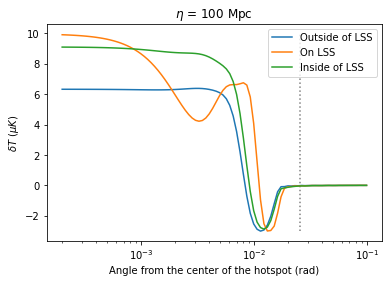

In [66]:
plt.plot(radius_arr[:ran],(eta100SW_angle_arr+eta100ISW_angle_arr)[1][:ran],label = 'Outside of LSS')
plt.plot(radius_arr[:ran],(eta100SW_angle_arr+eta100ISW_angle_arr)[25][:ran],label = 'On LSS')
plt.plot(radius_arr[:ran],(eta100SW_angle_arr+eta100ISW_angle_arr)[48][:ran],label = 'Inside of LSS')

plt.vlines(np.sqrt(4*np.pi)*100/13800, ymin = -3,ymax = 10, linestyle=':',color = 'grey')

plt.title(r"$\eta$ = 100 Mpc")
plt.legend()
plt.xscale('log')

plt.xlabel('Angle from the center of the hotspot (rad)')
plt.ylabel(r'$\delta T \,\,(\mu K)$')
plt.savefig(f"samp_img/eta100_radial_plot_angle.pdf",bbox_inches='tight')

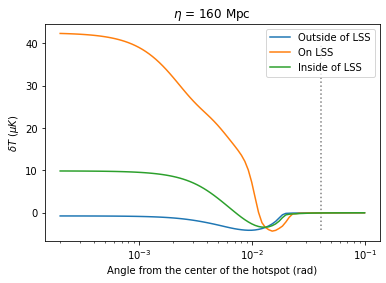

In [65]:
plt.plot(radius_arr[:ran],(eta160SW_angle_arr+eta160ISW_angle_arr)[1][:ran],label = 'Outside of LSS')
plt.plot(radius_arr[:ran],(eta160SW_angle_arr+eta160ISW_angle_arr)[25][:ran],label = 'On LSS')
plt.plot(radius_arr[:ran],(eta160SW_angle_arr+eta160ISW_angle_arr)[48][:ran],label = 'Inside of LSS')

plt.vlines(np.sqrt(4*np.pi)*160/13800, ymin = -4,ymax = 40, linestyle=':',color = 'grey')

plt.title(r"$\eta$ = 160 Mpc")
plt.legend()
plt.xscale('log')
plt.xlabel('Angle from the center of the hotspot (rad)')
plt.ylabel(r'$\delta T \,\,(\mu K)$')

plt.savefig(f"samp_img/eta160_radial_plot_angle.pdf",bbox_inches='tight')

In [4]:
tau_rec = 280.62745874925827

nside = 1024
LSS_radius = 13800-280

# A number of pixels
Npixels = 12*nside**2

# pixel size analytic(Rad)
pix_radsq = 4*np.pi/Npixels # Solid angle
pix_rad = np.sqrt(pix_radsq) # Square pixel side length in rad

pix_mpc = angle_to_eta(pix_rad) # (Mpc) 1 pixel size ~ 6.7 Mpc


r_bins = 50 # No need to change
#grid_len_r = eta*2/r_bins # Mpc (each grid length)
grid_len_x = pix_mpc # Mpc = grid_len_y


ang_arr = np.logspace(-3.7, -0.7, num=100)
#radius_arr = angle_to_eta(ang_arr) # Mpc
radius_arr = ang_arr
pix_arr = (0.2+np.arange(0,25))* grid_len_x # Mpc, Offset is introduced to mimic center pixel
#print(radius_arr[0]) 2.69 Mpc
#print(pix_arr[0])    2.70 Mpc

eta = 50

eta50SW_angle_arr = np.loadtxt(f'SW_stack_eta{eta}.txt')
eta50ISW_angle_arr = np.loadtxt(f'ISW_stack_eta{eta}.txt')

step50 = np.linspace(tau_rec-eta, tau_rec+eta, 50)

eta = 100

eta100SW_angle_arr = np.loadtxt(f'SW_stack_eta{eta}.txt')
eta100ISW_angle_arr = np.loadtxt(f'ISW_stack_eta{eta}.txt')

step100 = np.linspace(tau_rec-eta, tau_rec+eta, 50)

eta = 160

eta160SW_angle_arr = np.loadtxt(f'SW_stack.txt')
eta160ISW_angle_arr = np.loadtxt(f'ISW_stack.txt')

step160 = np.linspace(tau_rec-eta, tau_rec+eta, 50)

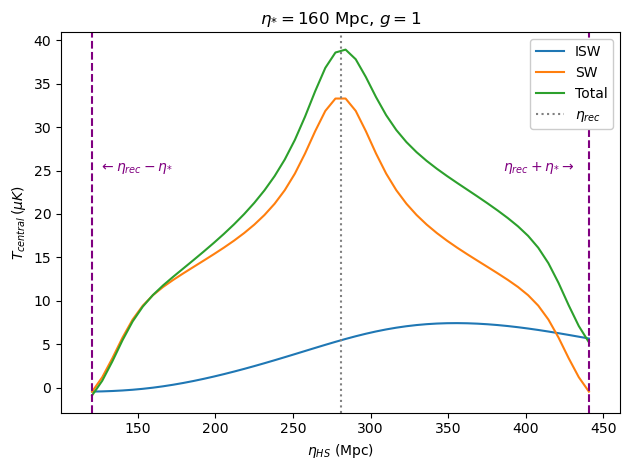

In [6]:
plt.plot(step160, eta160ISW_angle_arr.T[24][1:], label='ISW')
plt.plot(step160, eta160SW_angle_arr.T[24][1:], label='SW')
plt.plot(step160, np.array(eta160ISW_angle_arr.T[24][1:])+np.array(eta160SW_angle_arr.T[24][1:]), label='Total')
plt.xlabel('$\eta_{HS}$ (Mpc)')
plt.ylabel(r'$T_{central}\, (\mu K)$')
plt.axvline(x=tau_rec, color='gray',linestyle=':',label = r'$\eta_{rec}$')
plt.legend(framealpha=1)
plt.xlim(tau_rec-160-20,tau_rec+160+20)

plt.axvline(x=tau_rec-160, color='purple',linestyle='--')
plt.axvline(x=tau_rec+160, color='purple',linestyle='--')

plt.title('$\eta_{*} = 160$ Mpc, $g = 1$')
plt.text(x=125,y=25,s='$\leftarrow \eta_{rec}-\eta_{*}$',c='purple')
plt.text(x=385,y=25,s=r'$\eta_{rec}+\eta_{*}\rightarrow$',c='purple')

plt.tight_layout()
plt.savefig('central_temp_eta160.pdf')